In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
import math as mt
import sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

eps = np.finfo(float).eps

In [2]:
dataSet = pd.read_csv("./../input_data/q-1-1_output.csv")
Class = "xAttack"
columns = list(dataSet.columns)
X = dataSet[columns[:-1]].values
# X
Y = dataSet[Class]

In [3]:
K = 5
n = X.shape[0]
c = X.shape[1]


In [4]:
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
centroids = np.random.randn(K,c)*std + mean
centroids

array([[ 2.12861315,  3.61590353,  1.8124432 ,  1.2162026 , -0.33123552,
        -0.29940006,  1.12322835, -0.52024035, -1.64328046, -0.10119278,
        -2.20416172,  3.02271564,  0.61681042, -0.44153504],
       [ 5.93803859, -3.0079884 , -1.45725984, -0.91196158,  1.45654895,
         0.38913267,  0.28927534,  0.58138046,  2.18701257, -0.02655323,
        -0.3687873 , -1.35401544, -0.65309455,  0.80213027],
       [-2.56930047,  3.60189491,  1.97773916,  0.25081385, -0.38772383,
         2.5827086 ,  0.1521937 ,  0.91049382, -0.630657  , -0.586326  ,
         1.28541997,  0.92972599,  0.63702771, -1.26778143],
       [ 4.80568781,  1.43765741,  0.67690637, -1.156548  , -0.827837  ,
        -1.16292423, -0.07483766,  0.20749639, -0.9024169 ,  0.36295217,
        -0.0203348 ,  0.16923516, -1.00844001,  0.59676023],
       [-0.82823322, -0.67092264, -0.17257568,  0.30779057, -0.66323674,
         0.89030045, -0.07250833,  0.6025501 ,  1.91782622,  0.62453397,
        -0.73914595, -0.60

In [5]:
centers_new = deepcopy(centroids) # Store new centers

clusters = np.zeros(n)
distances = np.zeros((n,K))
error = 1
itr = 0
# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    itr += 1
    print("Iteration: ", itr)
    # Measure the distance to every center
    for i in range(K):
        distances[:,i] = np.linalg.norm(X - centers_new[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(K):
        centers_new[i] = np.mean(X[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6


array([[-6.27869971e-01, -6.57100394e+00, -2.17201729e+00,
        -5.00814381e+00,  4.81817813e-01,  1.97985031e+01,
        -5.23405826e+01, -8.21756341e+01,  2.86297634e+01,
         1.65946074e+01, -1.13279438e+02,  3.34774170e+01,
         3.13892888e-01,  6.25133440e+00],
       [ 4.73692667e-01, -5.70594275e+00,  1.25947616e-01,
         2.26463074e-01, -2.45213263e-01, -6.60124858e-01,
        -2.19948941e-01,  1.33499963e-02,  2.84996361e-02,
        -2.48377746e-02,  5.71683370e-02, -1.20314350e-02,
        -2.88839566e-02, -3.45466653e-02],
       [-6.74756371e-01, -4.09123562e-01, -3.74914481e+00,
        -1.92020595e+00, -2.06747990e+00,  8.99517971e+00,
        -1.46559121e+01,  1.10586065e+01, -5.03616954e+00,
        -1.57262279e+01,  2.22826187e+00,  1.89250573e+01,
        -9.24076201e-01,  6.71200680e-02],
       [ 3.76019367e+00,  1.21445213e+00, -1.34161994e-02,
        -2.75927012e-01,  8.28469243e-03, -2.51021535e-01,
        -1.51251446e-01, -5.03664503e-02,  1.

In [6]:
def pieplotter(labels, sizes):
    plt.figure(num=None, figsize=(6, 4), dpi=150, facecolor='c', edgecolor='k')
    
    colors = ['lightcoral','gold', 'yellowgreen','lightskyblue', 'red','blue']
    patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
    plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, 100*s/sum(sizes)) for l, s in zip(labels, sizes)])
    
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

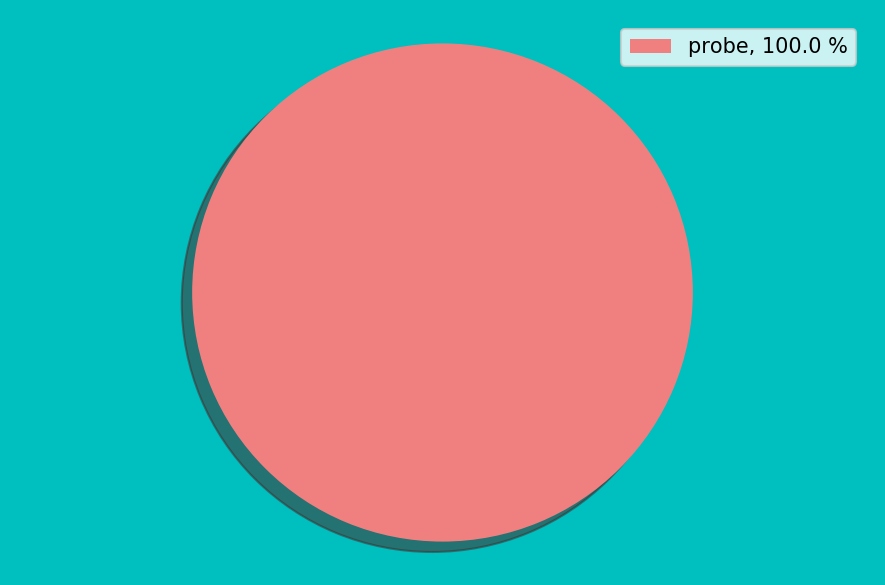

0 ['probe'] [1]


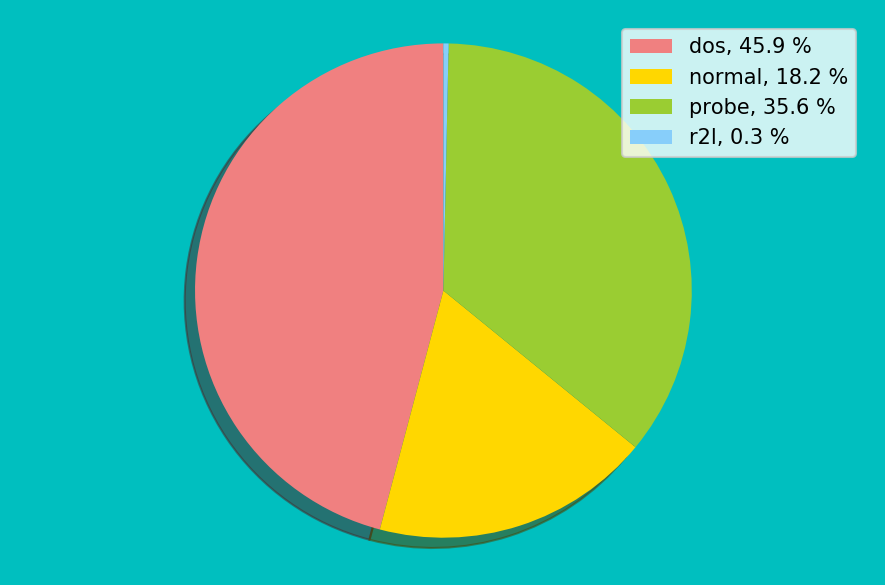

1 ['dos' 'normal' 'probe' 'r2l'] [1364  541 1058   10]


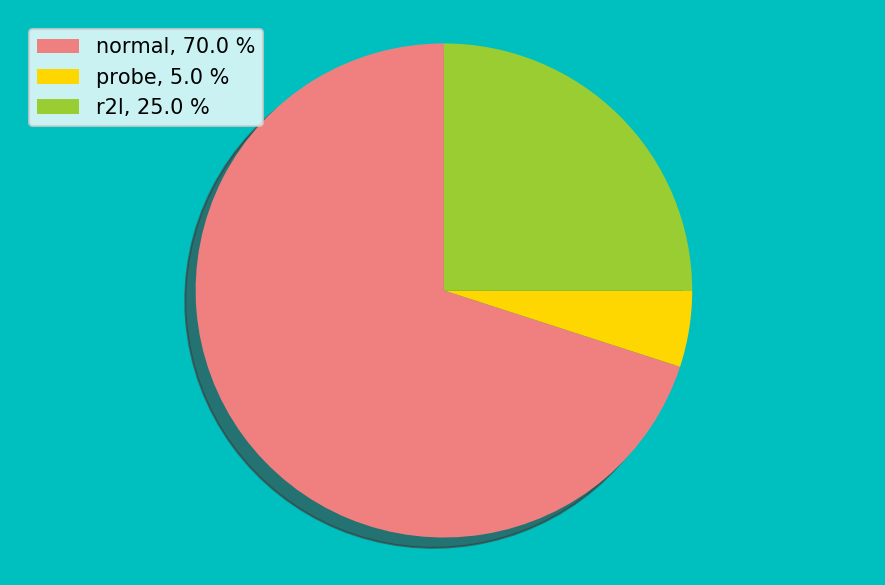

2 ['normal' 'probe' 'r2l'] [14  1  5]


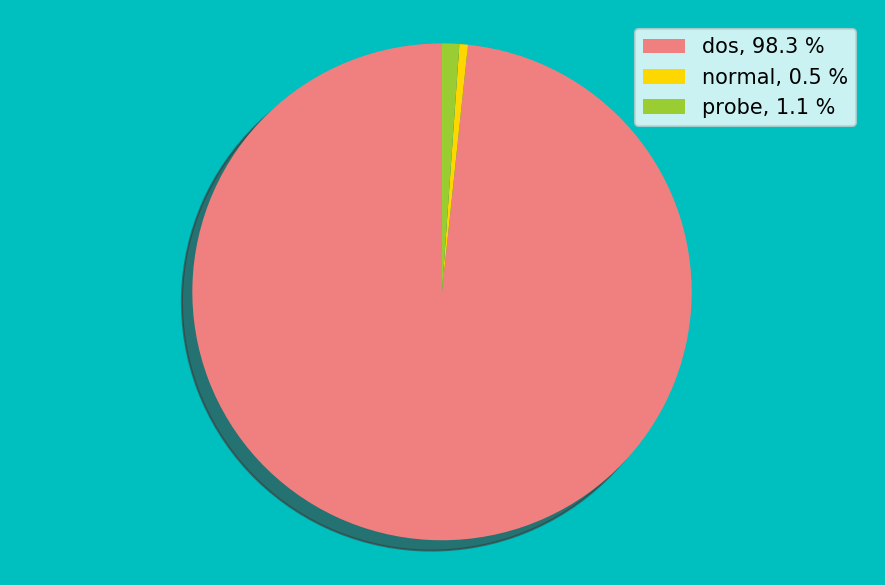

3 ['dos' 'normal' 'probe'] [6808   38   77]


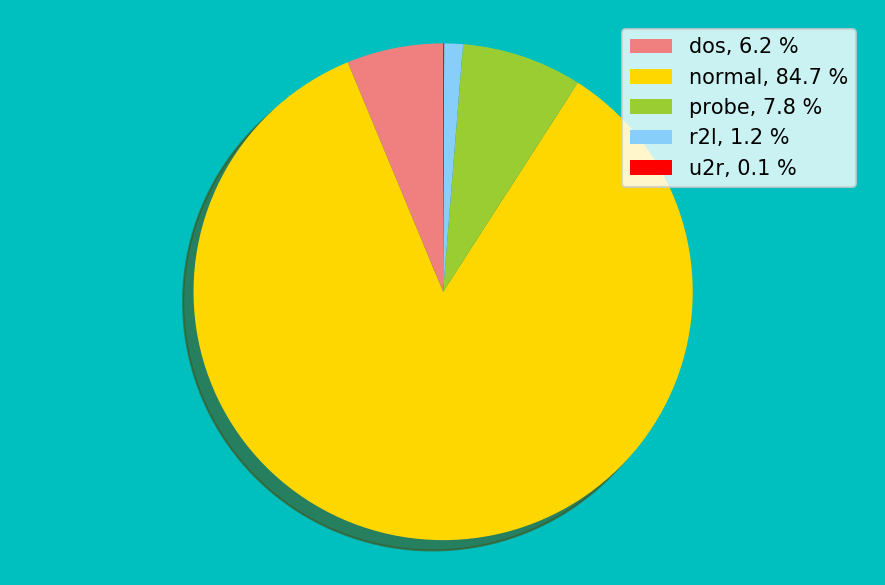

4 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [  942 12771  1176   182    10]


0.8383870709656772

In [7]:
max_sum = 0
for i in range(K):
    clValue,counts = np.unique(dataSet[Class][clusters == i],return_counts=True)  
    pieplotter(clValue, counts)
    print(i,clValue,counts)
    max_sum += max(counts)
purity = max_sum/dataSet.shape[0]
    
purity